# ML/AI Capstone Project 

**Overview**: In this part of the capstone, the goal is to perform the number crunching for the problem under consideration. For my research question I have chosen to find out given a dataset if there is a pattern for DDoS (Distributed Denial of Service) Attack on the application or a given IP address.  
The type of machine learning algorithm used for this module would be supervised learning, where algorithms explore data to find patterns with a defined output variable.


### About the Data

This dataset comes from Kaggle DDoS SDN Dataset [link]
(https://www.kaggle.com/datasets/aikenkazin/ddos-sdn-dataset/data).  

There is a one target variable called label: contains only 1 = malicious and 0 = benign. Using the predicted feature the goal is to classify whether the traffic is normal or not using a variety of classification Machine Learning Algorithms. 




### Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.feature_selection import SelectFromModel
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report


import time
import warnings
warnings.simplefilter(action='ignore')


In [2]:
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('data/dataset_sdn.csv')

In [4]:
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


#### Identify features and columns

In [5]:
df.shape

(104345, 23)

#### Identify column names

In [6]:
df.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

### Understanding the Task


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

### Engineering Features

#### We will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

#### Identify duplicates


In [8]:
df.duplicated().sum()

5091

#### Drop duplicates


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99254 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dt           99254 non-null  int64  
 1   switch       99254 non-null  int64  
 2   src          99254 non-null  object 
 3   dst          99254 non-null  object 
 4   pktcount     99254 non-null  int64  
 5   bytecount    99254 non-null  int64  
 6   dur          99254 non-null  int64  
 7   dur_nsec     99254 non-null  int64  
 8   tot_dur      99254 non-null  float64
 9   flows        99254 non-null  int64  
 10  packetins    99254 non-null  int64  
 11  pktperflow   99254 non-null  int64  
 12  byteperflow  99254 non-null  int64  
 13  pktrate      99254 non-null  int64  
 14  Pairflow     99254 non-null  int64  
 15  Protocol     99254 non-null  object 
 16  port_no      99254 non-null  int64  
 17  tx_bytes     99254 non-null  int64  
 18  rx_bytes     99254 non-null  int64  
 19  tx_kbps 

#### Rename columns for consistency

In [11]:
df = df.rename(columns={'Pairflow':'pairflow', 'Protocol':'protocol'})

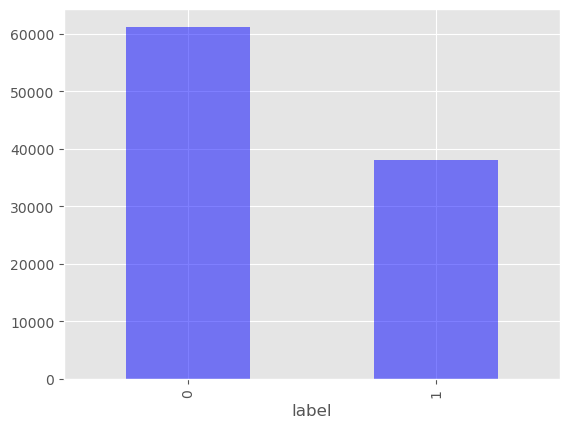

In [12]:
plt.colormaps
df['label'].value_counts().plot.bar(color="b", alpha=0.5);

#### Identify missing data


In [13]:
df.isna().mean().multiply(100) > 0

dt             False
switch         False
src            False
dst            False
pktcount       False
bytecount      False
dur            False
dur_nsec       False
tot_dur        False
flows          False
packetins      False
pktperflow     False
byteperflow    False
pktrate        False
pairflow       False
protocol       False
port_no        False
tx_bytes       False
rx_bytes       False
tx_kbps        False
rx_kbps         True
tot_kbps        True
label          False
dtype: bool

#### Plot of null data


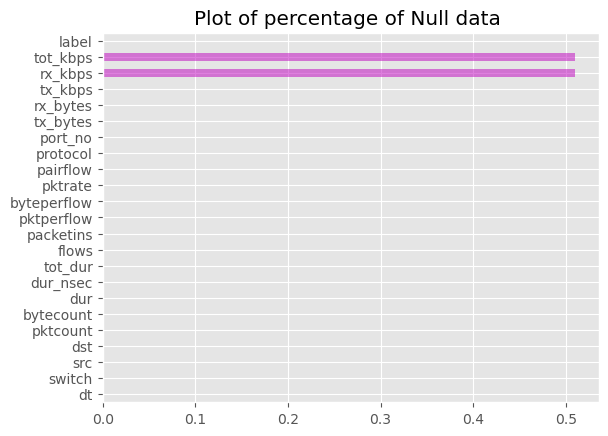

In [14]:
fig = df.isna().mean().multiply(100).round(2).plot(kind = 'barh', color="m", alpha=0.5);
fig.set_title("Plot of percentage of Null data ")
fig.plot();

#### Drop null data

In [15]:
# The null data is very low percentage of data and best course of action is dropping it
df.dropna(inplace=True)

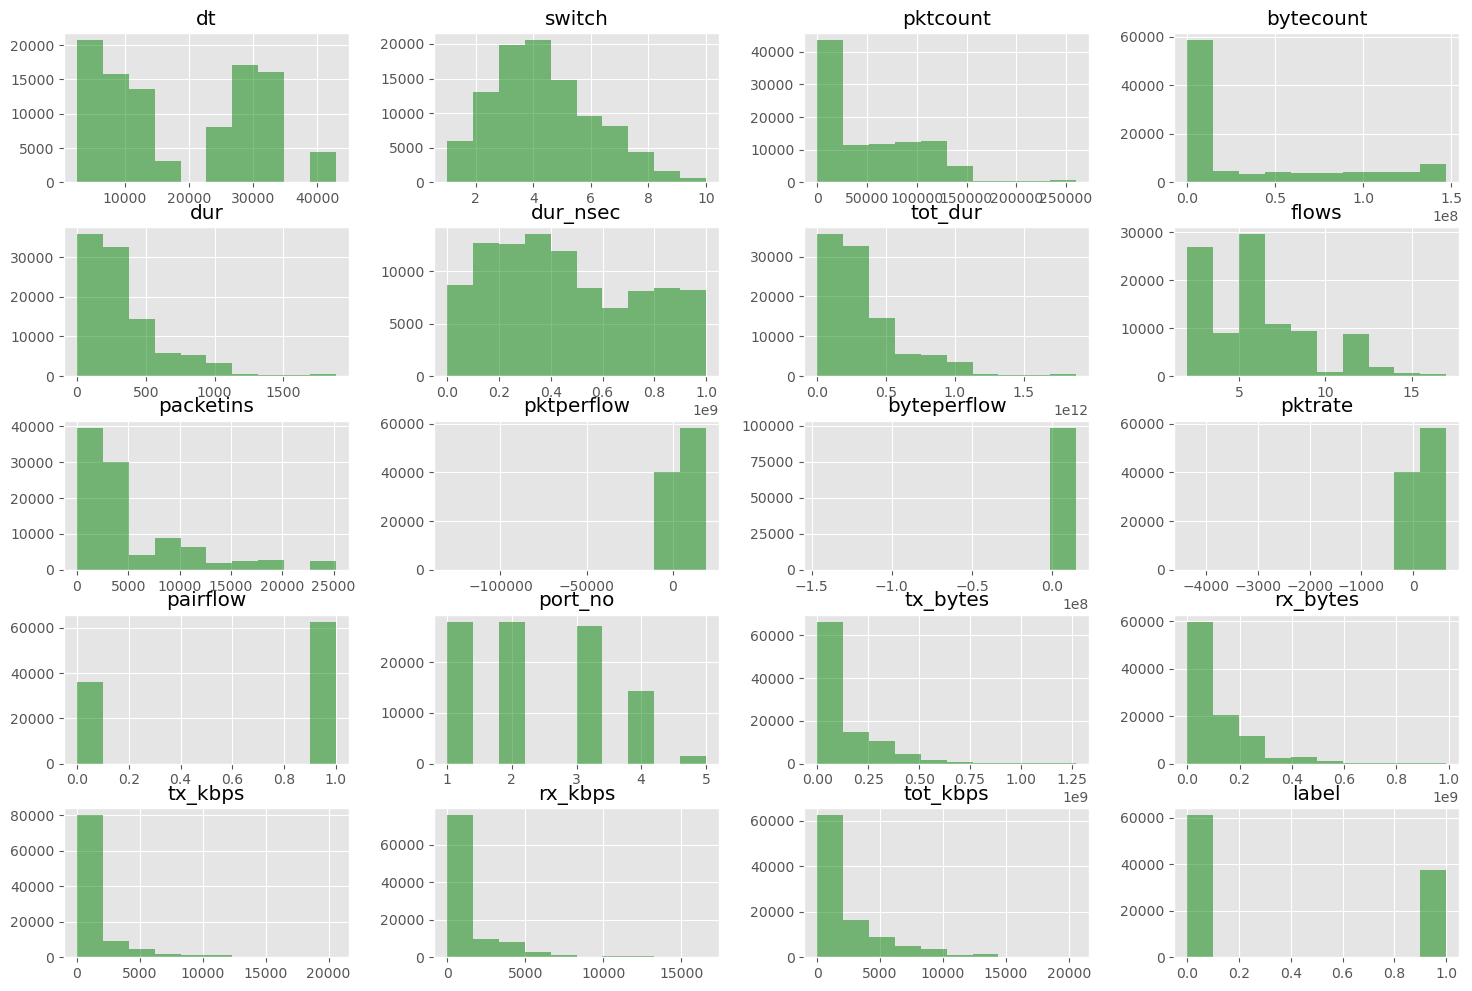

In [16]:
df.hist(figsize=(18,12), color="g", alpha=0.5);

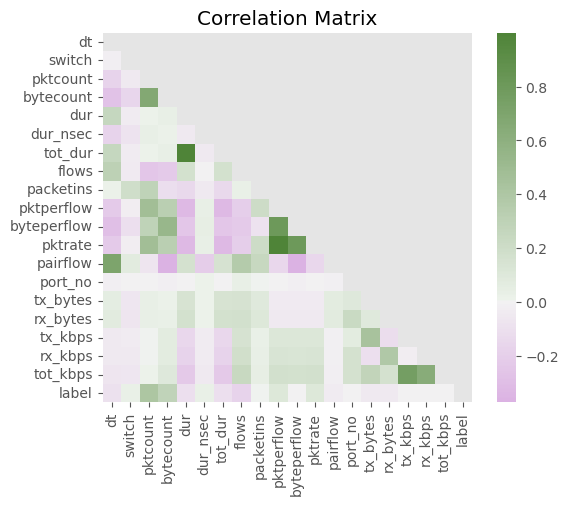

<Figure size 1500x1000 with 0 Axes>

In [20]:
corr = df.corr(numeric_only=True);

cmap = sns.diverging_palette(299, 120, as_cmap=True);
mask = np.triu(np.ones_like(corr, dtype=bool));

sns.heatmap(corr, mask=mask, center=0,
            fmt='.2f', square=True, cmap=cmap);

plt.title("Correlation Matrix")
plt.grid(False);
plt.figure(figsize=(15, 10));
plt.show();

#### Train/Test Split
With the data prepared, split it into a train and test sets

In [21]:
# Create Train and Test splits of data
X = df.drop(columns='label')
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Define the data structures where we can store the results
train_score = []
test_score = []
accuracy_train_score = []
accuracy_test_score = []
fit_time = []

#### Current split of Malicious vs Benign 

What percentage of labels are Malicious vs Benign?

In [23]:
classifier_baseline = y_train.value_counts(normalize=True).max()
print(f"The data contains about", classifier_baseline*100, "% benign attempts ")

The data contains about 61.84916742618232 % benign attempts 


#### Define extractor

In [24]:
extractor = SelectFromModel(LogisticRegression(penalty='l1', solver = 'liblinear' ,random_state = 42))

#### Define preprocessor

In [25]:
categorical_features = ['src','dst','protocol']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
    ], remainder = StandardScaler() # scale the remaining features
)

#### Logistic Regression

In [26]:
start_time = time.time()

lgr_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', extractor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
]).fit(X_train, y_train)

train_score.append(precision_score(y_train, lgr_pipe.predict(X_train)))
test_score.append(precision_score(y_test, lgr_pipe.predict(X_test)))

accuracy_train_score.append(accuracy_score(y_train, lgr_pipe.predict(X_train)))
accuracy_test_score.append(accuracy_score(y_test, lgr_pipe.predict(X_test)))

lr_end_time = time.time() - start_time
fit_time.append(lr_end_time)

### Score the Model

1. What is the accuracy of the Logistic Regression model?
2. Find the ROC curve to find out the area under curve and for Logistic Regression.

In [27]:
lr_model_train_accuracy=roc_auc_score(y_train, lgr_pipe.predict_proba(X_train)[:, 1])
print(f" Model accuracy ", lr_model_train_accuracy)

 Model accuracy  0.9037383906606604


### Model accuracy  90.37%

#### Plot the confusion matrix and ROC curve

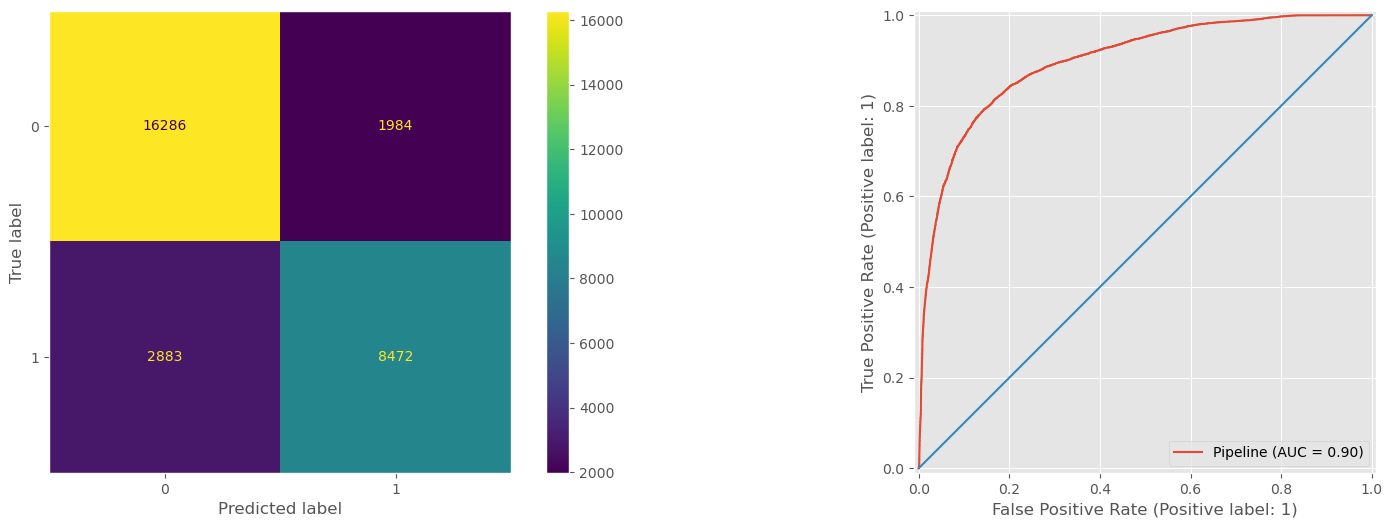

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(lgr_pipe, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(lgr_pipe, X_test, y_test, ax = ax[1])
ax[0].grid(False)
ax[1].plot(np.array([0, 1]), np.array([0, 1]));

### Other Models

The base logistic regression already has a 90% accuracy, we now aim to see if any other models will do any better?
1. KNN
2. SVC
3. Decision Tree


#### KNN (With scaled data)


In [29]:
start_time = time.time()

knn_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=3))
]).fit(X_train, y_train)

train_score.append(precision_score(y_train, knn_pipe.predict(X_train)))
test_score.append(precision_score(y_test, knn_pipe.predict(X_test)))

accuracy_train_score.append(accuracy_score(y_train, knn_pipe.predict(X_train)))
accuracy_test_score.append(accuracy_score(y_test, knn_pipe.predict(X_test)))

knn_end_time = time.time() - start_time
fit_time.append(knn_end_time)

#### SVC 


In [30]:
start_time = time.time()
svc_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear'))
]).fit(X_train, y_train)

train_score.append( precision_score(y_train, svc_pipe.predict(X_train)))
test_score.append( precision_score(y_test, svc_pipe.predict(X_test)))

accuracy_train_score.append(accuracy_score(y_train, svc_pipe.predict(X_train)))
accuracy_test_score.append(accuracy_score(y_test, svc_pipe.predict(X_test)))


svc_end_time = time.time() - start_time
fit_time.append(svc_end_time)

#### Decision tree


In [31]:
start_time = time.time()

dtree_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion='entropy', max_depth = 3))
]).fit(X_train, y_train)

# Predict and evaluate
train_score.append( precision_score(y_train, dtree_pipe.predict(X_train)))
test_score.append( precision_score(y_test, dtree_pipe.predict(X_test)))

accuracy_train_score.append(accuracy_score(y_train, dtree_pipe.predict(X_train)))
accuracy_test_score.append(accuracy_score(y_test, dtree_pipe.predict(X_test)))

# average end time
dtree_end_time = time.time() - start_time
fit_time.append(dtree_end_time)

#### Store Results

In [32]:
res_dict = {'Model': ['Logistic Reg', 'KNN', 'SVC', 'DTree'],
           'Train Accuracy': train_score,
            'Test accuracy': train_score,
           'Train precision': accuracy_train_score,
            'Test precision': accuracy_test_score,
           'Avg fit time': fit_time}
results_df = pd.DataFrame(res_dict).set_index('Model')

print(type(results_df))
print(results_df.shape)

<class 'pandas.core.frame.DataFrame'>
(4, 5)


#### Plot the ROC curve and Confusion Matrices

Text(0.5, 1.0, 'Decision Tree')

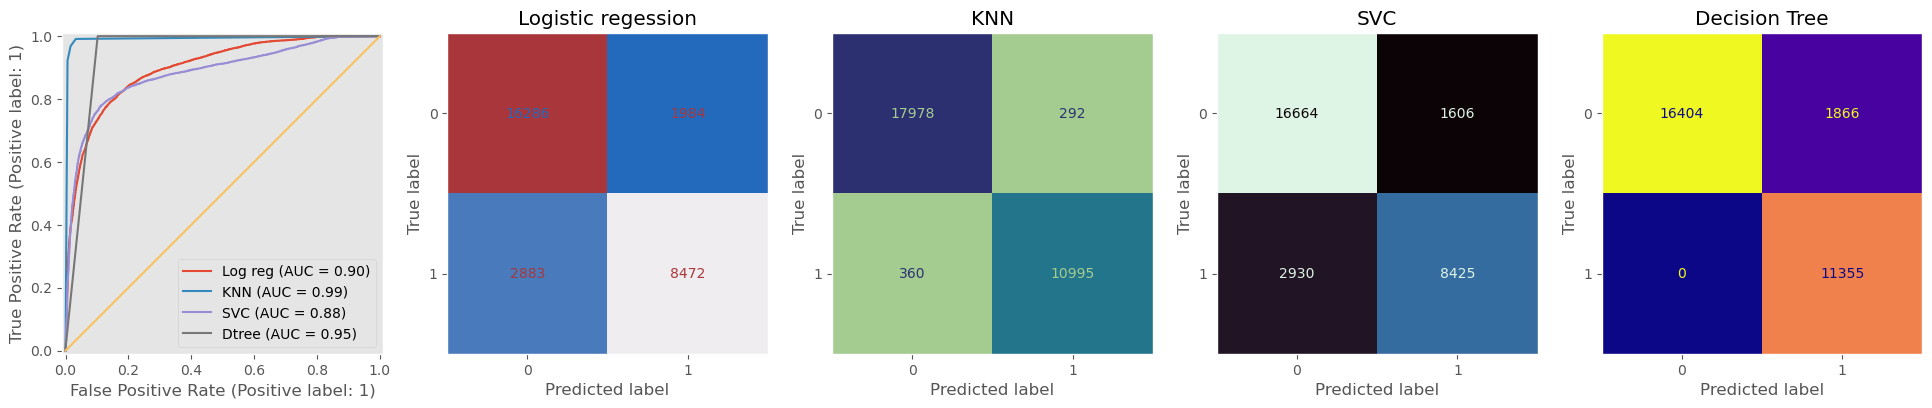

In [33]:
fig, ax = plt.subplots(1, 5, figsize = (24, 8))
ConfusionMatrixDisplay.from_estimator(lgr_pipe, X_test, y_test, ax = ax[1], cmap='vlag', colorbar=False)
ConfusionMatrixDisplay.from_estimator(knn_pipe, X_test, y_test, ax = ax[2], cmap='crest', colorbar=False)
ConfusionMatrixDisplay.from_estimator(svc_pipe, X_test, y_test, ax = ax[3], cmap='mako', colorbar=False)
ConfusionMatrixDisplay.from_estimator(dtree_pipe, X_test, y_test, ax = ax[4], cmap='plasma', colorbar=False)
RocCurveDisplay.from_estimator(lgr_pipe, X_test, y_test, ax = ax[0], name ='Log reg')
RocCurveDisplay.from_estimator(knn_pipe, X_test, y_test, ax = ax[0], name ='KNN')
RocCurveDisplay.from_estimator(svc_pipe, X_test, y_test, ax = ax[0], name='SVC')
RocCurveDisplay.from_estimator(dtree_pipe, X_test, y_test, ax = ax[0], name='Dtree')
ax[0].plot(np.array([0, 1]), np.array([0, 1]));
for i in range(0,5):
    ax[i].grid(False)
ax[1].set_title('Logistic regession')
ax[2].set_title('KNN')
ax[3].set_title('SVC')
ax[4].set_title('Decision Tree')

In [34]:
results_df

,Train Accuracy,Test accuracy,Train precision,Test precision,Avg fit time
Model,,,,,
Logistic Reg,0.812868,0.812868,0.838404,0.835713,21.073404
KNN,0.985250,0.985250,0.988759,0.977992,12.413190
SVC,0.845116,0.845116,0.851554,0.846886,494.983957
DTree,0.857259,0.857259,0.936476,0.937013,0.361457


In [35]:
report = classification_report(y_test, lgr_pipe.predict(X_test))
print("\nLogistic Regression Classification Report:")
print(report)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     18270
           1       0.81      0.75      0.78     11355

    accuracy                           0.84     29625
   macro avg       0.83      0.82      0.82     29625
weighted avg       0.83      0.84      0.83     29625



In [36]:
knn_report = classification_report(y_test, knn_pipe.predict(X_test))
print("\nKNN Regression Classification Report:")
print(knn_report)


KNN Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18270
           1       0.97      0.97      0.97     11355

    accuracy                           0.98     29625
   macro avg       0.98      0.98      0.98     29625
weighted avg       0.98      0.98      0.98     29625



In [37]:
report = classification_report(y_test, svc_pipe.predict(X_test))
print("\nSVC Regression Classification Report:")
print(report)


SVC Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     18270
           1       0.84      0.74      0.79     11355

    accuracy                           0.85     29625
   macro avg       0.85      0.83      0.83     29625
weighted avg       0.85      0.85      0.84     29625



### Improving the Model

Now that we have a few basic models on the board, we want to try to improve these.  Below, we list a few things to explore in by hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
We are going to define the hyperparameters for tuning and run the individual models aftewards.
One constraint I ran into here was this logic could not be ran inside of a loop, due to the variables holding memory

In [38]:
# Define the models and their hyperparameters
logreg1 = LogisticRegression()
knn1 = KNeighborsClassifier()
dtree1 = DecisionTreeClassifier()
svc1 = SVC()

# Hyperparameters for grid search
param_grid_logreg = {
    'classifier__C': [0.1, 1, 10, 100]
}
param_grid_knn = {
    'knn__n_neighbors': [1, 3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance']
}
param_grid_dtree = {
    'dtree__criterion': ['gini', 'entropy'],
    'dtree__max_depth': [5, 10, 20, 30, 40, 50]
}
param_grid_svc = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf']
}

In [39]:
# Logistic Regression
start_time = time.time()
lgr_pipe_1 = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', extractor),
    ('classifier', LogisticRegression())
]).fit(X_train, y_train)
grid_search_logreg = GridSearchCV(lgr_pipe_1, param_grid_logreg, cv=5)
grid_search_logreg.fit(X_train, y_train)
logreg_time = time.time() - start_time
best_logreg = grid_search_logreg.best_estimator_
logreg_accuracy = accuracy_score(y_test, best_logreg.predict(X_test))

In [40]:
# KNN
start_time = time.time()
knn_pipe_1 = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', extractor),
    ('knn', KNeighborsClassifier())
]).fit(X_train, y_train)
grid_search_knn = GridSearchCV(knn_pipe_1, param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)
knn_time = time.time() - start_time
best_knn = grid_search_knn.best_estimator_
knn_accuracy = accuracy_score(y_test, best_knn.predict(X_test))

In [41]:
# Decision Tree
start_time = time.time()
dtree_pipe_1 = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', extractor),
    ('dtree', DecisionTreeClassifier())
]).fit(X_train, y_train)
grid_search_dt = GridSearchCV(dtree_pipe_1, param_grid_dtree, cv=5)
grid_search_dt.fit(X_train, y_train)  
dt_time = time.time() - start_time
best_dt = grid_search_dt.best_estimator_
dt_accuracy = accuracy_score(y_test, best_dt.predict(X_test))

In [42]:
# Store the results into an array
best_param = [grid_search_logreg.best_params_, grid_search_knn.best_params_, grid_search_dt.best_params_]
accuracy = [logreg_accuracy, knn_accuracy, dt_accuracy]
avg_time = [logreg_time, knn_time, dt_time]

In [43]:
res2_dict = {'model': ['Logistic Reg', 'KNN', 'DTree'],
                'best param': best_param, 
                 'accuracy': accuracy,
                 'avg. time': avg_time
            }
results2_df = pd.DataFrame(res2_dict).set_index('model')

In [44]:
pd.set_option('display.max_colwidth', None)
results2_df

,best param,accuracy,avg. time
model,,,
Logistic Reg,{'classifier__C': 10},0.835443,269.826678
KNN,"{'knn__n_neighbors': 5, 'knn__weights': 'distance'}",0.978329,613.242613
DTree,"{'dtree__criterion': 'entropy', 'dtree__max_depth': 30}",1.000000,689.489871


#### Plot Optimized ROC curve and Decision Tree

Text(0.5, 1.0, 'Decision Tree')

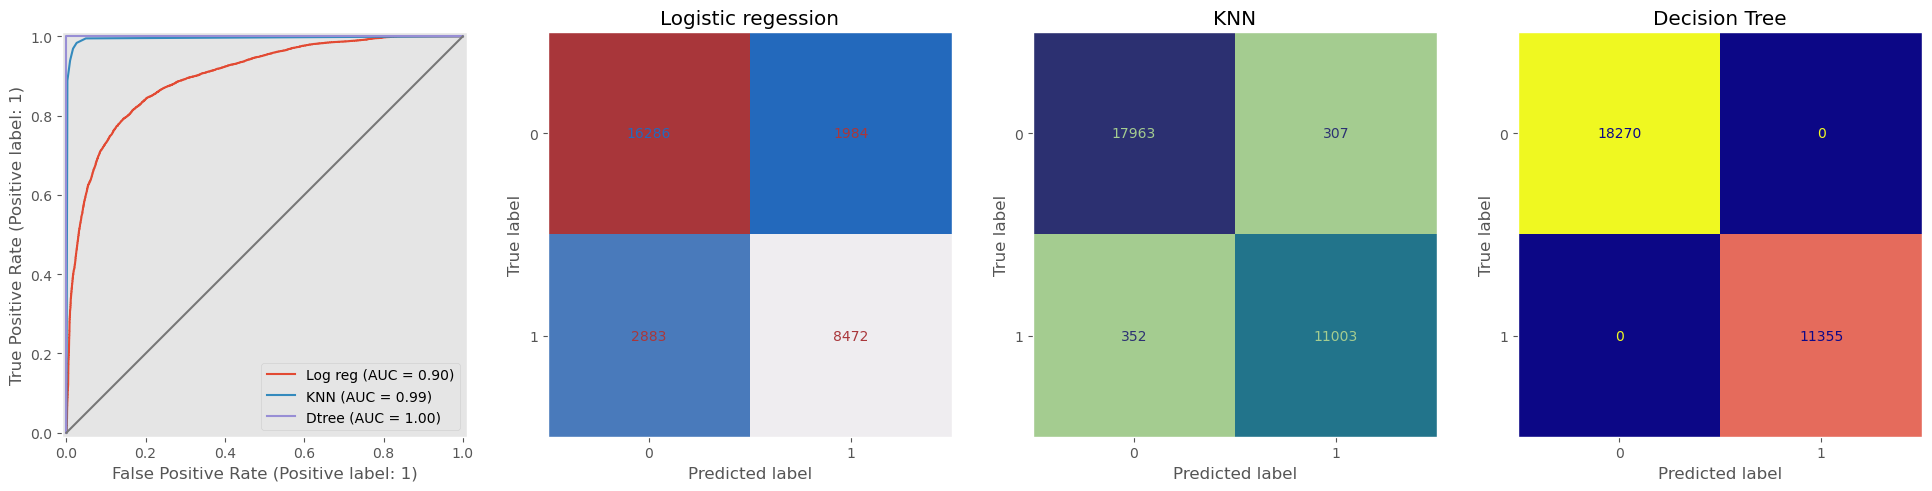

In [45]:
fig, ax = plt.subplots(1, 4, figsize = (24, 8))
ConfusionMatrixDisplay.from_estimator(lgr_pipe_1, X_test, y_test, ax = ax[1], cmap='vlag', colorbar=False)
ConfusionMatrixDisplay.from_estimator(knn_pipe_1, X_test, y_test, ax = ax[2], cmap='crest', colorbar=False)
ConfusionMatrixDisplay.from_estimator(dtree_pipe_1, X_test, y_test, ax = ax[3], cmap='plasma', colorbar=False)
RocCurveDisplay.from_estimator(lgr_pipe_1, X_test, y_test, ax = ax[0], name ='Log reg')
RocCurveDisplay.from_estimator(knn_pipe_1, X_test, y_test, ax = ax[0], name ='KNN')
RocCurveDisplay.from_estimator(dtree_pipe_1, X_test, y_test, ax = ax[0], name='Dtree')
ax[0].plot(np.array([0, 1]), np.array([0, 1]));
for i in range(0,4):
    ax[i].grid(False)
ax[1].set_title('Logistic regession')
ax[2].set_title('KNN')
#ax[3].set_title('SVC')
ax[3].set_title('Decision Tree')

## Explore Neural Network Regression model

In [48]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

#### Scale the data

In [62]:
X_ohe = pd.get_dummies(X, columns = ['src','dst','protocol'], dummy_na=False, dtype=int)

In [63]:
std = StandardScaler()
X_scaled = std.fit_transform(X_ohe) #scale the data y_train is 0 or 1 so does not need scaling

#### Use the function `Sequential()` to create a neural network `model` with the following architecture:


- A single hidden `Dense` layer with 100 hidden nodes and with `activation` equal to `relu` 
- A single hidden `Dense` layer with 1 unit and with activation equal to  `linear` 

In [67]:
model = Sequential([Dense(100, activation = 'relu'),
                   Dense(1, activation = 'linear')])
model.compile(loss = 'mse', metrics = ['mse'])
history = model.fit(X_scaled, y, validation_split = 0.2, epochs = 20, verbose = 0, )

#### Score the model

In [72]:
history.history['mse'][-1]

0.011802202090620995

#### The model peformance is really good with 0.012 MSE score 